## Problema 1

### Funções de suporte e principais definições

In [19]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, linalg
global option

In [20]:
import numpy as np

# ## Function definitions
# f = −∆u(x, y)

u = lambda x, y: x**4 - 6*x**2*y**2 + y**4  # item (a)
f_u = lambda x, y: -12 * (x**2 + y**2)

v = lambda x, y: np.exp(x) * np.sin(y)  # item (b)
f_v = lambda x, y: -np.exp(x) * np.sin(y)


In [21]:
def poisson_system(N: int, f: float, g: float):
    """
    Builds the linear system A·u = b resulting from the finite difference
    discretization of the Poisson equation -Δu = f on the unit square [0,1]²,
    with Dirichlet boundary conditions given by the function g.

    Parameters:
        N (int): Number of subdivisions in each direction (grid step h = 1/N).
        f (function): Function f(x, y) representing the right-hand side of the equation.
        g (function): Boundary condition function u(x, y) defined on the domain boundary.

    Returns:
        A: Sparse matrix representing the discrete Laplacian.
        b: Right-hand side vector including source and boundary contributions.
    """
    h = 1 / N
    n = (N - 1) ** 2 
    diagonals = [-1, -1, 4, -1, -1]
    offsets = [-N + 1, -1, 0, 1, N - 1]  # check the diagonal offsets

    # matrix A
    A: csc_array = diags(diagonals=diagonals, offsets=offsets, shape=(n, n)).tocsc()

    # vector b (equation terms and boundary conditions)
    b = np.zeros(n)

    # Filling b with f (interior points)
    for k in range(1, N):
        for j in range(1, N):
            i = (k - 1) * (N - 1) + (j - 1)  # lexicographic ordering
            x, y = k * h, j * h
            b[i] = h ** 2 * f(x, y)

            # Borders (left -> right) & (bottom -> top): boundary conditions
            if k == 1:
                b[i] -= g(0, y)  # left border
            if k == N - 1:
                b[i] -= g(1, y)  # right border
            if j == 1:
                b[i] -= g(x, 0)  # bottom border
            if j == N - 1:
                b[i] -= g(x, 1)  # top border

    return A, b


In [22]:
def plot_solution(N: int, exact_sol: float, numeric_sol: float, title: str):
    """
    Plots the exact and numerical solutions for the Poisson problem over a unit square.

    Parameters:
        N (int): Number of subdivisions (grid will be (N+1) x (N+1)).
        exact_sol (function): Function u(x, y) giving the exact solution.
        numeric_sol (np.ndarray): Flattened array with the numerical solution at interior points.
        title (str): Title used in the plots to describe the solution.
    """
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)

    # Exact solution
    exact = exact_sol(X, Y)

    # Insert numerical solution into interior grid points
    numeric = np.zeros((N+1, N+1))
    numeric[1:N, 1:N] = numeric_sol.reshape((N-1, N-1))

    # Plots
    fig = plt.figure(figsize=(12, 6))

    # 3D plot of the exact solution
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, exact, cmap='plasma')
    ax1.set_title(f"Exact solution ($u_{{exact}}$) of {title} - N={N}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('u')

    # Contour plot (level curves)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, exact, cmap='plasma')
    fig.colorbar(contour, ax=ax2)
    ax2.set_title(f"Level curves of $u_{{exact}}$")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.show()


In [23]:
def prompt(event=None):
    """
    Retrieves user selections from GUI dropdowns and computes the numerical
    solution of the Poisson equation accordingly. It selects the exact solution
    and its corresponding right-hand side function, constructs the linear system,
    solves it, and plots the result.

    Parameters:
        event (optional): GUI event trigger (e.g., button press or dropdown selection).
    """
    eq_choice = combo_eq.get()
    N_choice = combo_N.get()

    if eq_choice == 'u(x, y) = x^4 - 6x^2y^2 + y^4':
        exact = u
        f = f_u
        title = 'u(x, y) = x^4 - 6x^2y^2 + y^4'
    elif eq_choice == 'u(x, y) = exp(x) * sin(y)':
        exact = v
        f = f_v
        title = 'u(x, y) = exp(x) * sin(y)'
    else:
        print("Invalid selection.")
        return

    if N_choice == 'N = 20':
        N = 20
    elif N_choice == 'N = 50':
        N = 50
    elif N_choice == 'N = 100':
        N = 100
    else:
        print("Invalid selection.")
        return

    g = lambda x, y: exact(x, y)

    A, b = poisson_system(N, f, g)
    numeric = linalg.spsolve(A, b)

    plot_solution(N, exact, numeric, title)


    Resultados gráficos

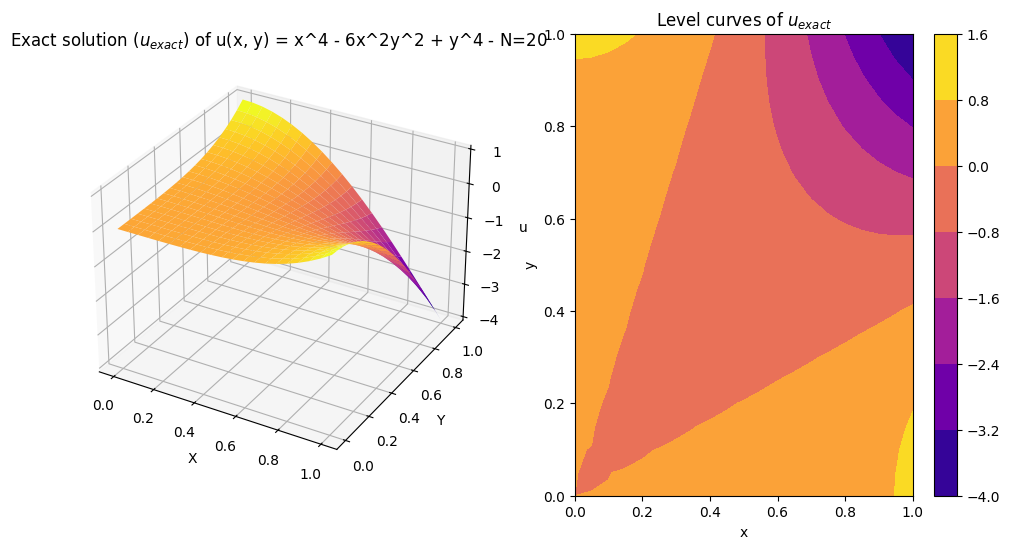

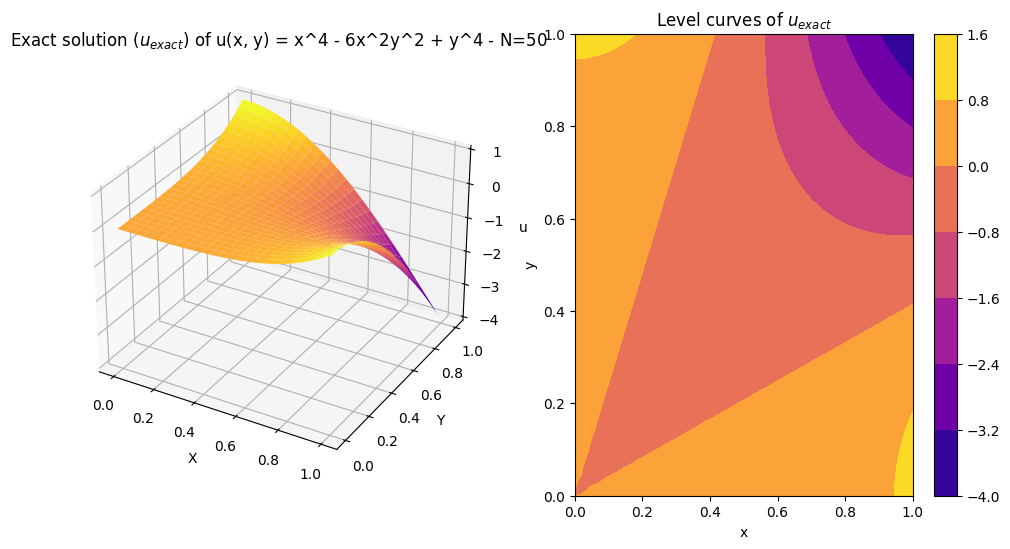

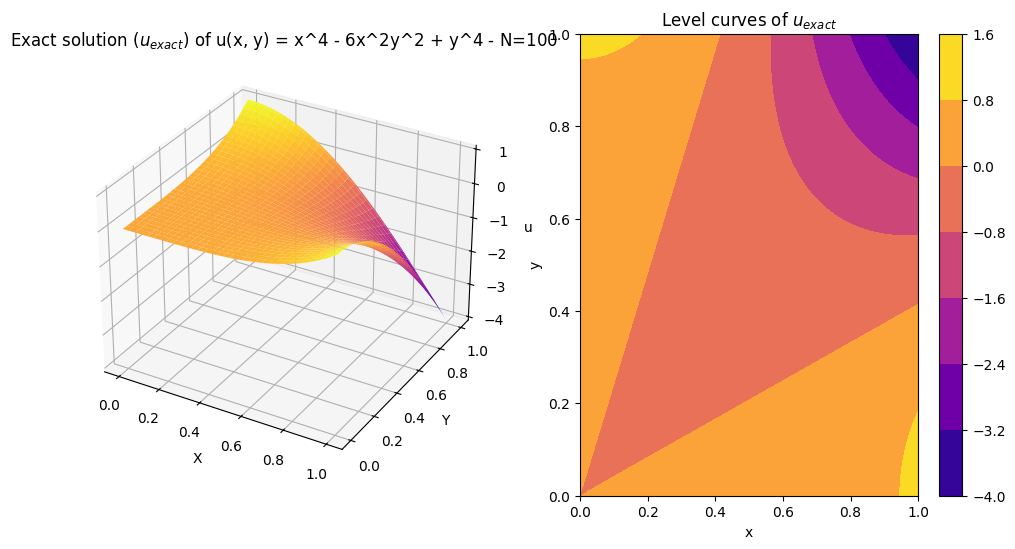

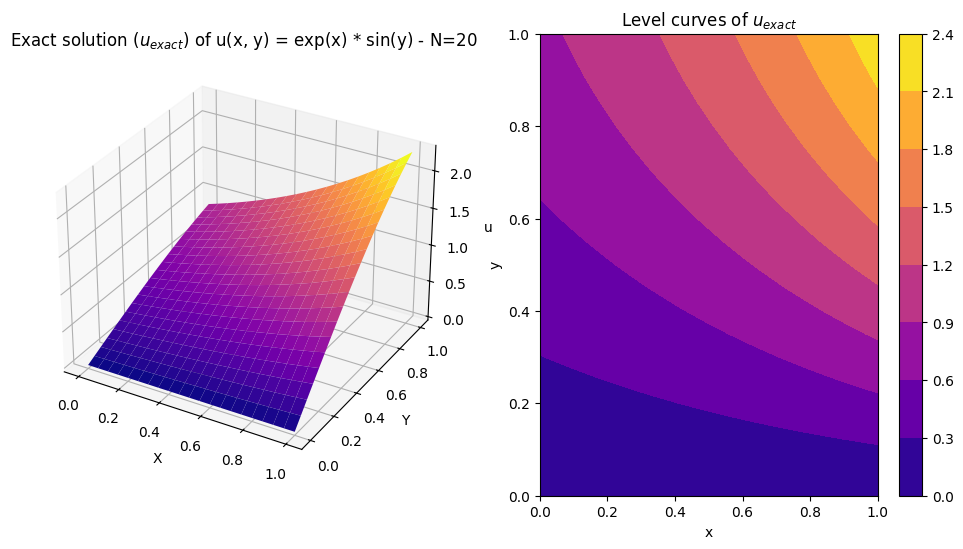

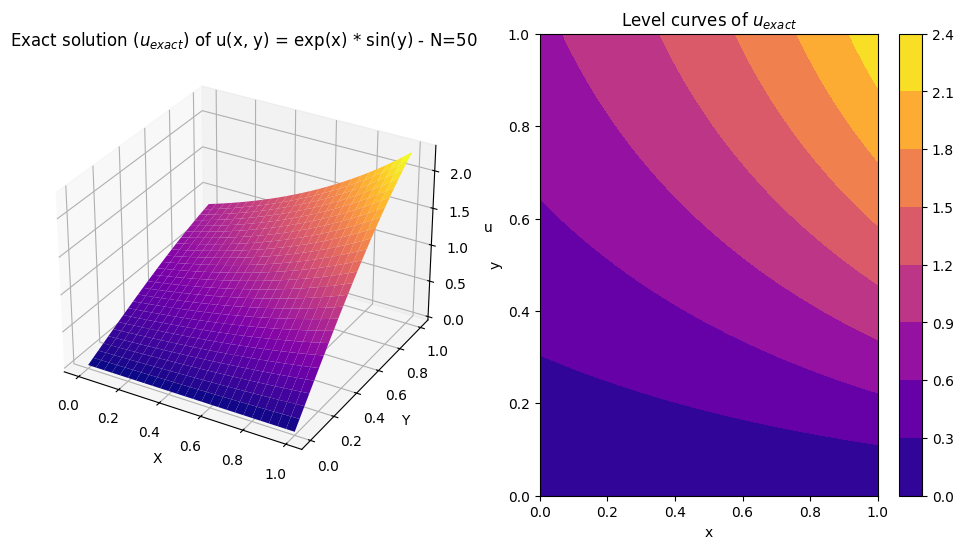

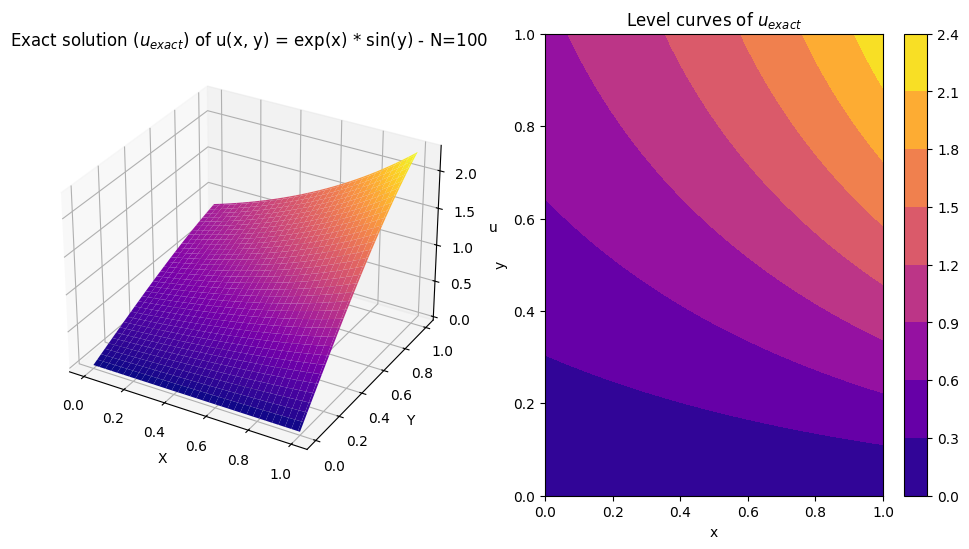

In [24]:
root = tk.Tk()
root.title("Poisson Equation Solver")

# Labels
label_eq = ttk.Label(root, text="Choose an equation to solve:")
label_eq.pack(pady=10)

# Combobox for equation selection
combo_eq = ttk.Combobox(root, values=[
    'u(x, y) = x^4 - 6x^2y^2 + y^4',
    'u(x, y) = exp(x) * sin(y)'
])
combo_eq.pack(pady=10)
combo_eq.current(0)  # Selects the first equation as default

# Combobox for choosing N
label_N = ttk.Label(root, text="Choose a value for N:")
label_N.pack(pady=10)

combo_N = ttk.Combobox(root, values=[
    'N = 20',
    'N = 50',
    'N = 100'
])
combo_N.pack(pady=10)
combo_N.current(0)  # Selects N = 20 as default

# Button to solve the equation
btn_resolver = ttk.Button(root, text="Solve", command=prompt)
btn_resolver.pack(pady=20)

# Label to display the result
resultado_label = ttk.Label(root, text="")
resultado_label.pack(pady=10)

root.mainloop()
